<a href="https://colab.research.google.com/github/KrimssmirK/CCDATS1L_PROJECT_COM-ML201/blob/main/Data_Science_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science 1 Project

## Questions

1. Why does College-graduated-Filipino usually say to be better work to other countries?
2. Why do parents usually say to their children to graduate a college?


## Setup

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retrieve dataset

In [109]:
# get the dataset from github repository
!git clone https://github.com/KrimssmirK/CCDATS1L_PROJECT_COM-ML201.git


dataset_path = "/content/CCDATS1L_PROJECT_COM-ML201/dataset.csv"
dataset = pd.read_csv(dataset_path)
dataset.head(5)

fatal: destination path 'CCDATS1L_PROJECT_COM-ML201' already exists and is not an empty directory.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [110]:
dataset.size

488415

## Data Wrangling

### Remove Extra Space in column names

List all columns in the dataset

In [111]:
columns = list(dataset.columns)
columns

['age',
 ' workclass',
 ' fnlwgt',
 ' education',
 ' education-num',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week',
 ' native-country',
 ' income']

fix the extra space in column names

In [112]:
# remove extra space
for i, col in enumerate(columns):
  columns[i] = columns[i].strip()

# rename the column names
dataset.columns = columns

In [113]:
# check if it is fixed
list(dataset.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

### Check NaN values

In [114]:
print("Missing values distribution: ")
print(dataset.isnull().mean())

Missing values distribution: 
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


Check the datatype of each column in the dataset

In [115]:
print("Column datatypes: ")
print(dataset.dtypes)

Column datatypes: 
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


### Remove extra space in data

In [116]:
# remove extra space
for col in dataset.columns:
  if dataset[col].dtype != "int64":
    dataset[col] = dataset[col].str.strip()

### Check each column (clean & extract)

#### AGE

In [194]:
dataset["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

It seems it has no outliers

In [195]:
print("age distribution:")
print(dataset["age"].describe())

age distribution:
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


#### WORKCLASS

In [119]:
dataset["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

workclass column has '?' value

In [120]:
# change value from '?' to 'unknown' in workclass column
workclass = dataset["workclass"]
dataset.iloc[workclass == "?", 1] = "unknown"

In [121]:
dataset["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

extract government data (yes/no)

In [122]:
government = []
for _workclass in workclass:
  if _workclass in ("State-gov", "Federal-gov", "Local-gov"):
    government.append(True)
  else:
    government.append(False)
dataset.insert(2, "government", government, allow_duplicates=True)
dataset.head(5)

,age,workclass,government,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,True,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,False,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,False,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,False,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,False,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### FNLWGT

In [123]:
print("fnlwgt distribution:")
print(dataset["fnlwgt"].describe())

fnlwgt distribution:
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


 #### EDUCATION

In [124]:
dataset["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

extract graduate data (for question #1)

In [125]:
educations = dataset["education"]
graduate = []
for education in educations:
  if education not in ("Bachelors", "Masters", "Doctorate"):
    graduate.append(False)
  else:
    graduate.append(True)

dataset.insert(5, "graduate", graduate, allow_duplicates=True)
dataset.head(5)

,age,workclass,government,fnlwgt,education,graduate,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,True,77516,Bachelors,True,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,False,83311,Bachelors,True,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,False,215646,HS-grad,False,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,False,234721,11th,False,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,False,338409,Bachelors,True,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### EDUCATION-NUM

In [126]:
print("education-num distribution:")
print(dataset["education-num"].describe())

education-num distribution:
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


#### MARITAL-STATUS

In [133]:
dataset["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

extract civil status data

In [134]:
marital_status = dataset["marital-status"]
civil_status = []
for status in marital_status:
  if status in ("Never-married", "Divorced", "Widowed"):
    civil_status.append("Single")
  else:
    civil_status.append("Married")

dataset.insert(8, "civil-status", civil_status, allow_duplicates=True)
dataset.head(5)

,age,workclass,government,fnlwgt,education,graduate,education-num,marital-status,civil-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,True,77516,Bachelors,True,13,Never-married,sigle,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,False,83311,Bachelors,True,13,Married-civ-spouse,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,False,215646,HS-grad,False,9,Divorced,sigle,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,False,234721,11th,False,7,Married-civ-spouse,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,False,338409,Bachelors,True,13,Married-civ-spouse,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### OCCUPATION

In [135]:
dataset["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

#### RELATIONSHIP

In [136]:
dataset["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

#### RACE

In [137]:
dataset["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

#### SEX

In [138]:
dataset["sex"].unique()

array(['Male', 'Female'], dtype=object)

#### CAPITAL-GAIN

In [139]:
dataset["capital-gain"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

#### CAPITAL-LOSS

In [140]:
dataset["capital-loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

#### HOURS-PER-WEEK

In [141]:
dataset["hours-per-week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [142]:
print("hours-per-week distribution:")
print(dataset["hours-per-week"].describe())

hours-per-week distribution:
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


#### NATIVE-COUNTRY

In [129]:
dataset["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

## Analysis

## graduated people income comparison between Philippines and Japan

In [201]:
# create a dataset for Philippines and Japan
country = dataset["native-country"]
Philippines = dataset[country == "Philippines"]
Japan = dataset[country == "Japan"]

# reset index
Philippines = Philippines.set_index([pd.Index(range(0, len(Philippines)))])
Japan = Japan.set_index([pd.Index(range(0, len(Japan)))])

In [202]:
Philippines.head(5)

,age,workclass,government,fnlwgt,education,graduate,education-num,marital-status,civil-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,False,163003,Bachelors,True,13,Never-married,sigle,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
1,27,Private,False,116358,Some-college,False,10,Never-married,sigle,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,1980,40,Philippines,<=50K
2,29,State-gov,True,71592,Some-college,False,10,Never-married,sigle,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
3,32,Private,False,270335,Bachelors,True,13,Married-civ-spouse,married,Adm-clerical,Other-relative,White,Male,0,0,40,Philippines,>50K
4,42,Federal-gov,True,158926,Assoc-acdm,False,12,Divorced,sigle,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,>50K


In [203]:
Philippines.size

3564

In [204]:
len(Philippines)

198

In [205]:
len(Philippines[Philippines["graduate"] == True])

82

In [206]:
Japan.head(5)

,age,workclass,government,fnlwgt,education,graduate,education-num,marital-status,civil-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,41,Private,False,198316,Some-college,False,10,Never-married,sigle,Craft-repair,Not-in-family,White,Male,0,0,50,Japan,<=50K
1,53,Private,False,288020,Bachelors,True,13,Married-civ-spouse,married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Japan,<=50K
2,29,Private,False,419721,HS-grad,False,9,Never-married,sigle,Other-service,Unmarried,Black,Female,0,0,40,Japan,<=50K
3,52,Private,False,152234,HS-grad,False,9,Married-civ-spouse,married,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
4,47,Self-emp-not-inc,False,162924,Bachelors,True,13,Divorced,sigle,Exec-managerial,Not-in-family,Asian-Pac-Islander,Male,0,0,60,Japan,<=50K


In [207]:
Japan.size

1116

In [208]:
len(Japan)

62

In [209]:
len(Japan[Japan["graduate"] == True])

27

the size is not the same so let's take a sample of size 20 each to make a comparison

In [210]:
sample_jp = Japan[Japan["graduate"] == True].sample(n=20)
sample_ph = Philippines[Philippines["graduate"] == True].sample(n=20)

In [211]:
print("Japan:")
print(sample_jp["income"].value_counts())
print()
print("Philippines:")
print(sample_ph["income"].value_counts())

Japan:
>50K     11
<=50K     9
Name: income, dtype: int64

Philippines:
>50K     13
<=50K     7
Name: income, dtype: int64


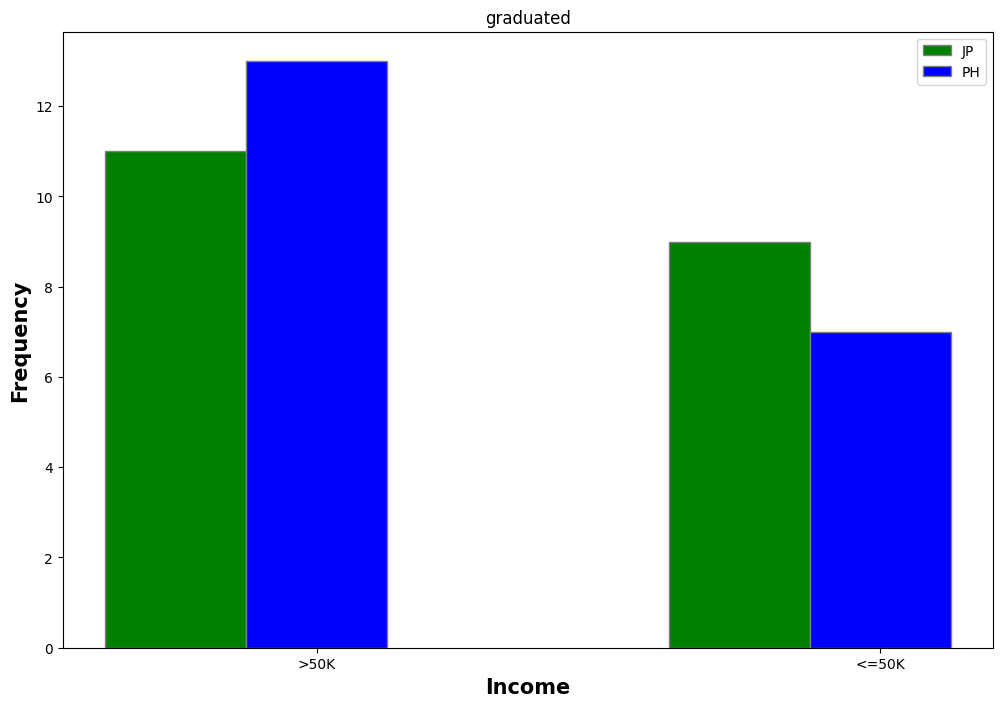

In [212]:
# creating the bar plot

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
JP = sample_jp["income"].value_counts()
PH = sample_ph["income"].value_counts()

# Set position of bar on X axis
br1 = np.arange(len(JP))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, JP, color='g', width=barWidth,
        edgecolor='grey', label ='JP')
plt.bar(br2, PH, color='b', width=barWidth,
        edgecolor='grey', label ='PH')

# Adding Xticks
plt.xlabel('Income', fontweight ='bold', fontsize = 15)
plt.ylabel('Frequency', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(JP))],
        ['>50K', '<=50K'])

plt.legend()
plt.title("graduated")
plt.show()